In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Ruta del archivo Excel
EXCEL_PATH = "colombia_coffee_v1_0_3.xlsx"

# Carpeta de salida para gráficos y CSV
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [6]:
# Obtener todas las hojas
xls = pd.ExcelFile(EXCEL_PATH)
year_sheets = [s for s in xls.sheet_names if s.lower().startswith("year")]

# Leer y unir
frames = []
for sheet in year_sheets:
    df = pd.read_excel(EXCEL_PATH, sheet_name=sheet)
    df['Year'] = sheet.replace("Year ", "").strip()
    frames.append(df)

df_all = pd.concat(frames, ignore_index=True)

# Convertir a numérico
df_all['Trade volume'] = pd.to_numeric(df_all['Trade volume'], errors='coerce')
df_all['Trade value'] = pd.to_numeric(df_all['Trade value'], errors='coerce')

# Crear columna en toneladas
df_all['Trade volume (t)'] = df_all['Trade volume'] / 1000

df_all.head()


,Year,Country of production,Coffee bean,Department,Municipality of export,Exporter,Exporter group,Importer,Importer group,Country of destination,Economic bloc,Department trase id,Country of production (Trase ID),Country of destination (Trase ID),Trade volume,Trade value,Trade volume (t)
0,2012,COLOMBIA,GREEN,HUILA,BUENAVENTURA,CIA CAFETERA LA MESETA S A,CIA CAFETERA LA MESETA S A,PERSNAM CORP,PERSNAM CORP,TAIWAN,TAIWAN,CO-41,CO,TW,18.20500,96323.380000,0.018205
1,2012,COLOMBIA,GREEN,CAUCA,BUENAVENTURA,FEDERACION NACIONAL DE CAFETEROS DE COLOMBIA,FEDERACION NACIONAL DE CAFETEROS DE COLOMBIA,UNKNOWN,UNKNOWN,SOUTH KOREA,SOUTH KOREA,CO-19,CO,KR,207.49519,886148.857507,0.207495
2,2012,COLOMBIA,GREEN,HUILA,BUENAVENTURA,SKN CARIBECAFE LTD,SKN CARIBECAFE LTD,BERNHARD ROTHFOS INTERCAFE,BERNHARD ROTHFOS INTERCAFE,LATVIA,EUROPEAN UNION,CO-41,CO,LV,38.49900,156262.020000,0.038499
3,2012,COLOMBIA,GREEN,QUINDIO,BUENAVENTURA,S LAUMAYER Y CIA EXPORTADORES DE CAFE S A,S LAUMAYER Y CIA EXPORTADORES DE CAFE S A,COFFEE AMERICA USA,COFFEE AMERICA USA,UNITED STATES,UNITED STATES,CO-63,CO,US,230.86000,872614.930000,0.230860
4,2012,COLOMBIA,GREEN,ANTIOQUIA,CARTAGENA DE INDIAS,TRILLADORA UNION S A,TRILLADORA UNION S A,UNKNOWN,UNKNOWN,SPAIN,EUROPEAN UNION,CO-05,CO,ES,19.27600,72752.920000,0.019276


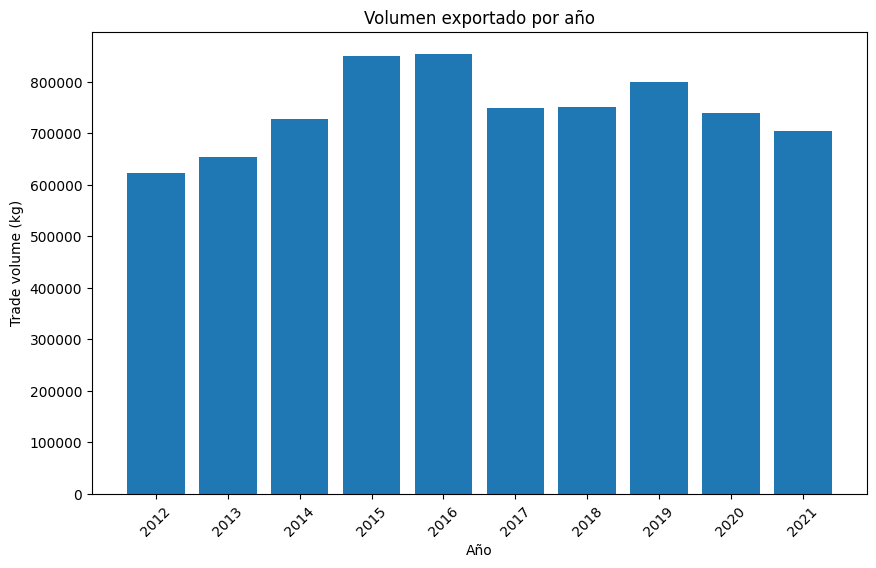

In [7]:
per_year = df_all.groupby('Year', as_index=False)['Trade volume'].sum()

plt.figure(figsize=(10,6))
plt.bar(per_year['Year'], per_year['Trade volume'])
plt.title('Volumen exportado por año')
plt.xlabel('Año')
plt.ylabel('Trade volume (kg)')
plt.xticks(rotation=45)
plt.show()


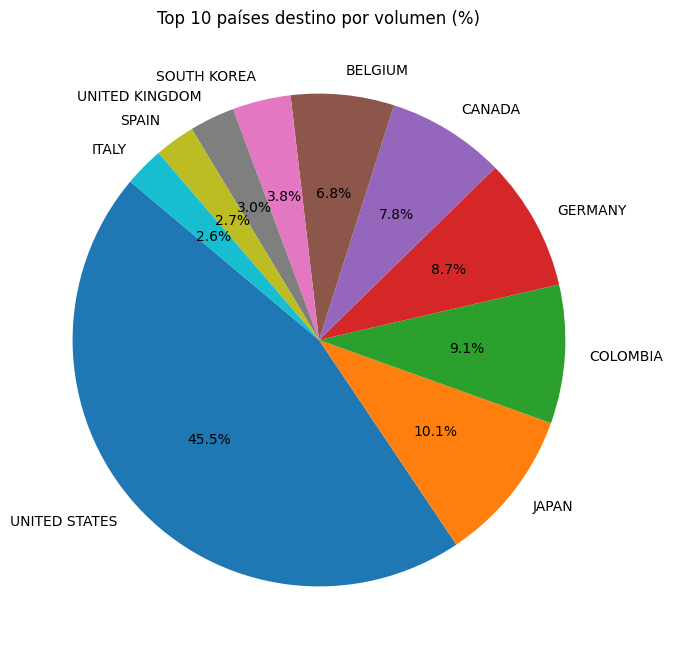

In [8]:
by_country = (
    df_all.groupby('Country of destination', as_index=False)['Trade volume']
    .sum()
    .sort_values('Trade volume', ascending=False)
)

top10_c = by_country.head(10)

plt.figure(figsize=(8,8))
plt.pie(top10_c['Trade volume'], labels=top10_c['Country of destination'],
        autopct='%1.1f%%', startangle=140)
plt.title('Top 10 países destino por volumen (%)')
plt.show()


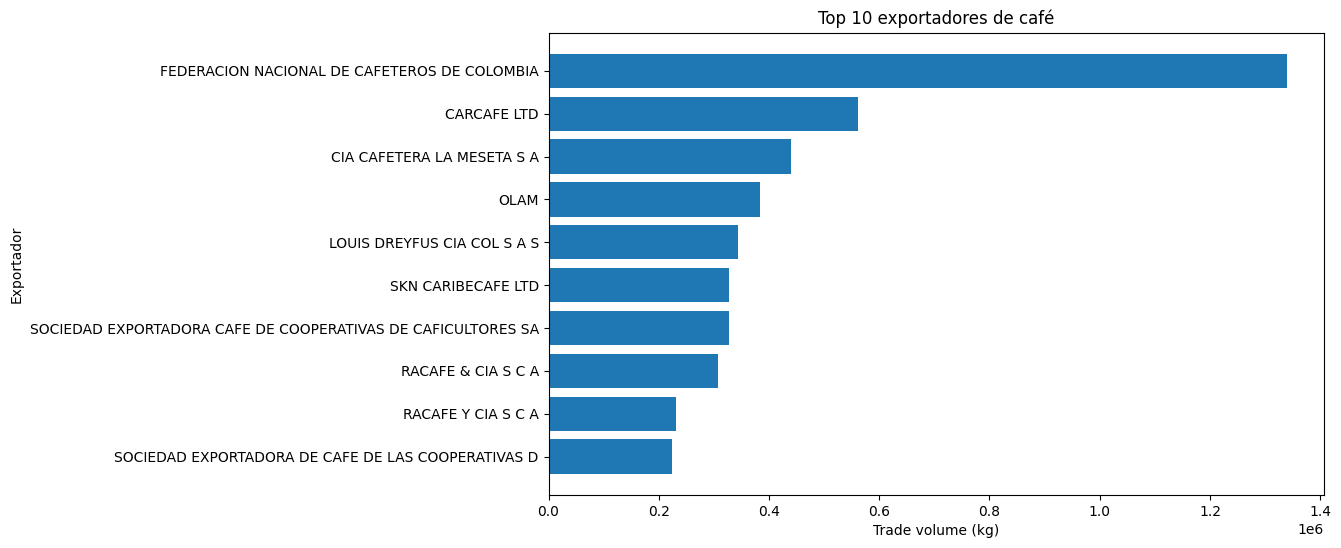

In [9]:
by_exporter = (
    df_all.groupby('Exporter', as_index=False)['Trade volume']
    .sum()
    .sort_values('Trade volume', ascending=False)
)

top10_e = by_exporter.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10_e['Exporter'], top10_e['Trade volume'])
plt.xlabel('Trade volume (kg)')
plt.ylabel('Exportador')
plt.title('Top 10 exportadores de café')
plt.gca().invert_yaxis()
plt.show()


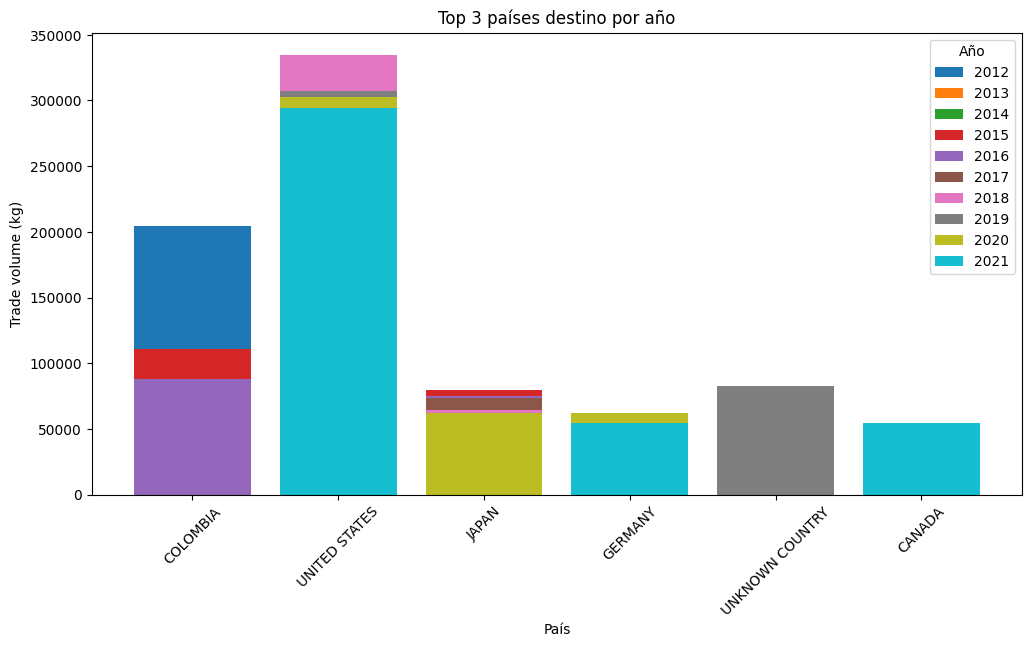

In [10]:
by_year_country = (
    df_all.groupby(['Year','Country of destination'], as_index=False)['Trade volume']
    .sum()
    .sort_values(['Year','Trade volume'], ascending=[True,False])
)

top3_countries = by_year_country.groupby('Year').head(3)

plt.figure(figsize=(12,6))
for year in top3_countries['Year'].unique():
    temp = top3_countries[top3_countries['Year'] == year]
    plt.bar(temp['Country of destination'], temp['Trade volume'], label=year)

plt.title('Top 3 países destino por año')
plt.xlabel('País')
plt.ylabel('Trade volume (kg)')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()


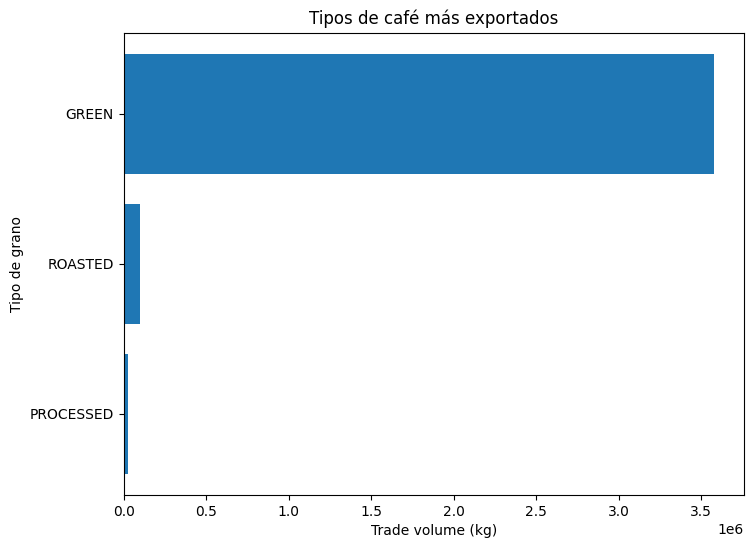

In [11]:
beans = (
    df_all.groupby('Coffee bean', as_index=False)['Trade volume']
    .sum()
    .sort_values('Trade volume', ascending=False)
)

plt.figure(figsize=(8,6))
plt.barh(beans['Coffee bean'], beans['Trade volume'])
plt.xlabel('Trade volume (kg)')
plt.ylabel('Tipo de grano')
plt.title('Tipos de café más exportados')
plt.gca().invert_yaxis()
plt.show()


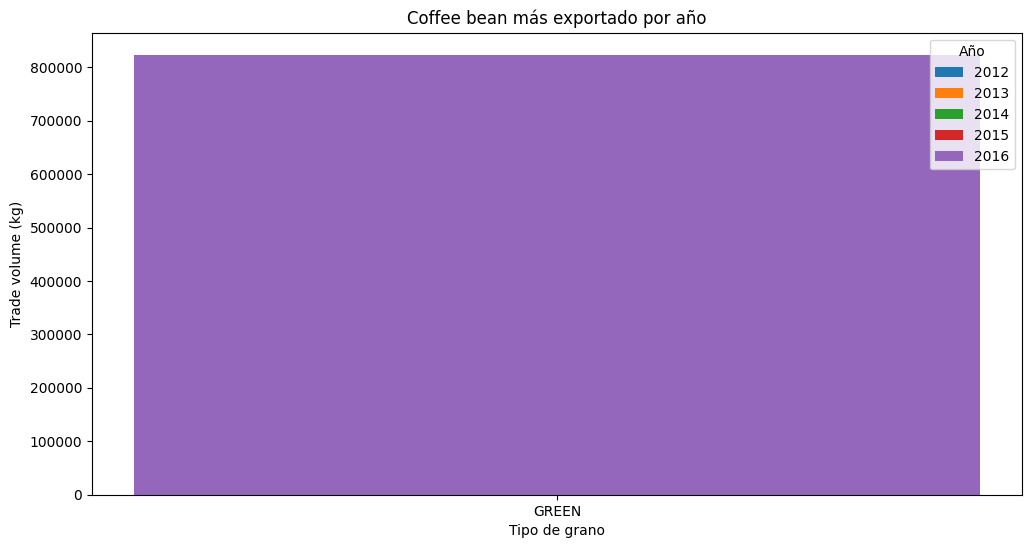

In [12]:
beans_year = (
    df_all.groupby(['Year','Coffee bean'], as_index=False)['Trade volume']
    .sum()
    .sort_values(['Year','Trade volume'], ascending=[True,False])
)

top1_bean_year = beans_year.groupby('Year').head(1)

plt.figure(figsize=(12,6))
for year in top1_bean_year['Year'].unique():
    temp = top1_bean_year[top1_bean_year['Year'] == year]
    plt.bar(temp['Coffee bean'], temp['Trade volume'], label=year)

plt.title('Coffee bean más exportado por año')
plt.xlabel('Tipo de grano')
plt.ylabel('Trade volume (kg)')
plt.legend(title='Año')
plt.show()
